## Lending Club Case Study
### Contributor : Debarshi Chakraborty
#### Class : CL48 
##### Executive PG Programme in Machine Learning & AI - December 2022

In [13]:
import pandas as pd
import numpy as np

In [14]:
# The source data file of 'loan.csv' needs to be on the same path as this file of code.
# else the full path needs to be given

df_loan = pd.read_csv('loan.csv', low_memory=False)

## Data Cleaning

### Step 1: Dropping columns which are irrelevant to the study and contains only NA values.

In [15]:
# Identified these columns in EXCEL using filter on the values. this could have been acheived in python
# as well but objective here is EDA and thus using multiple tools to do the cleaning and analysis
cols_NA_2b_dropped = [
"annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal",
"open_acc_6m","open_il_6m","open_il_12m","open_il_24m","mths_since_rcnt_il","total_bal_il","il_util","open_rv_12m",
"open_rv_24m","max_bal_bc","all_util","total_rev_hi_lim","inq_fi","total_cu_tl","inq_last_12m","acc_open_past_24mths",
"avg_cur_bal","bc_open_to_buy","bc_util","chargeoff_within_12_mths","delinq_amnt","mo_sin_old_il_acct","mo_sin_old_rev_tl_op",
"mo_sin_rcnt_rev_tl_op","mo_sin_rcnt_tl","mort_acc","mths_since_recent_bc","mths_since_recent_bc_dlq","mths_since_recent_inq",
"mths_since_recent_revol_delinq","num_accts_ever_120_pd","num_actv_bc_tl","num_actv_rev_tl","num_bc_sats","num_bc_tl",
"num_il_tl","num_op_rev_tl","num_rev_accts","num_rev_tl_bal_gt_0","num_sats","num_tl_120dpd_2m","num_tl_30dpd",
"num_tl_90g_dpd_24m","num_tl_op_past_12m","pct_tl_nvr_dlq","percent_bc_gt_75","pub_rec_bankruptcies","tax_liens",
"tot_hi_cred_lim","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit","mths_since_last_major_derog"]
# removing the columns listed in the above array from the dataframe
df_loan.drop(cols_NA_2b_dropped, 
             axis = 1, 
             inplace=True)

### Step 2: Dropping columns that has single values or informative-but-not-contributing values.

In [16]:
# Identified these columns in EXCEL using filter on the values. this could have been acheived in python
# as well but objective here is EDA and thus using multiple tools to do the cleaning and analysis
# has selected the 'member_id' also as there is another unique identifier of 'id'
cols_NC_2b_dropped = [
"application_type","policy_code","collections_12_mths_ex_med","title",
"desc","url","pymnt_plan","emp_title","member_id"]
# removing the columns listed in the above array from the dataframe
df_loan.drop(cols_NC_2b_dropped, 
             axis = 1, 
             inplace=True)

### Step 3: Dropping rows based on some column condition

In [17]:
# we will create a new data frame for only 'Charged Off' rows. basically we are taking off the fully paid and current loans
df_loan_chargedOff = df_loan.loc[df_loan["loan_status"] == "Charged Off"]

In [18]:
# There are rows where the issued loan is zero and still have status as 'Charged Off'
# we need to delete these rows
df_loan_chargedOff.drop(df_loan_chargedOff[df_loan_chargedOff['funded_amnt_inv'] == 0].index, inplace = True)

C:\Users\Debarshi\AppData\Local\Temp\ipykernel_3236\2432750849.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan_chargedOff.drop(df_loan_chargedOff[df_loan_chargedOff['funded_amnt_inv'] == 0].index, inplace = True)


### Step 4: Adding new column(s) for data analysis

In [19]:
# Adding a new column 'remaining_pncp' = remaining principle 
# which is the amount issued by investors - returned principle till date
df_loan_chargedOff['remaining_pncp'] = df_loan_chargedOff['funded_amnt_inv'] - df_loan_chargedOff['total_rec_prncp']

C:\Users\Debarshi\AppData\Local\Temp\ipykernel_3236\832317011.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan_chargedOff['remaining_pncp'] = df_loan_chargedOff['funded_amnt_inv'] - df_loan_chargedOff['total_rec_prncp']


### Step 5: Dropping few more rows

In [20]:
## It is observed that many places the principle amount is returned and in fact more amount being paid
## we will use the newly added column of remaining principle as negative
count_negative = len(df_loan_chargedOff[df_loan_chargedOff['remaining_pncp'] <= 0])
if (count_negative > 0):
    df_loan_chargedOff.drop(df_loan_chargedOff[df_loan_chargedOff['remaining_pncp'] <=0].index, inplace = True)

C:\Users\Debarshi\AppData\Local\Temp\ipykernel_3236\3942836731.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan_chargedOff.drop(df_loan_chargedOff[df_loan_chargedOff['remaining_pncp'] <=0].index, inplace = True)


In [21]:
df_loan_chargedOff

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,remaining_pncp
1,1077430,2500,2500,2500.000000,60 months,15.27%,59.83,C,C4,< 1 year,...,456.46,435.17,0.0,117.080000,1.1100,Apr-13,119.66,NaN,Sep-13,2043.540000
8,1071795,5600,5600,5600.000000,60 months,21.28%,152.39,F,F2,4 years,...,162.02,294.94,0.0,189.060000,2.0900,Apr-12,152.39,NaN,Aug-12,5437.980000
9,1071570,5375,5375,5350.000000,60 months,12.69%,121.45,B,B5,< 1 year,...,673.48,533.42,0.0,269.290000,2.5200,Nov-12,121.45,NaN,Mar-13,4676.520000
12,1064687,9000,9000,9000.000000,36 months,13.49%,305.38,C,C1,< 1 year,...,1256.14,570.26,0.0,444.300000,4.1600,Jul-12,305.38,NaN,Nov-12,7743.860000
14,1069057,10000,10000,10000.000000,36 months,10.65%,325.74,B,B2,3 years,...,5433.47,1393.42,0.0,645.100000,6.3145,Oct-13,325.74,NaN,Mar-14,4566.530000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39593,141774,20000,4800,1949.999594,36 months,13.12%,162.01,D,D5,8 years,...,1028.79,427.59,0.0,148.920000,5.7222,Aug-08,162.01,NaN,May-16,921.209594
39603,139790,3000,3000,2200.000721,36 months,12.49%,100.35,D,D3,< 1 year,...,1956.75,545.00,0.0,1095.984061,389.8900,Dec-09,100.35,NaN,May-16,243.250721
39609,137271,2100,2100,1099.995904,36 months,12.49%,70.25,D,D3,< 1 year,...,400.45,160.03,0.0,1753.490000,613.6000,Jun-08,70.25,NaN,May-16,699.545904
39652,123230,3175,3175,1425.000000,36 months,11.54%,104.76,C,C5,< 1 year,...,455.95,172.24,0.0,0.000000,0.0000,Mar-08,104.76,NaN,Apr-16,969.050000


## Data Analysis

### 1. Grade : LC assigned loan grade

<AxesSubplot:ylabel='remaining_pncp'>

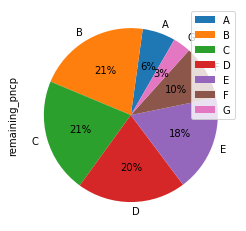

In [45]:
# Plotting the pie chart for above dataframe
# grouping the GRADES based on the sum of remaining principal amount still remaining to be reovered
df_loan_chargedOff.groupby(['grade']).sum().plot(
    kind='pie', y='remaining_pncp', autopct='%1.0f%%',startangle=60)

### Conclusion
- **The category of B,C,D and E contributed to 80% of the remaining principal to be recovered**

### 2. Grade : LC assigned loan grade X Purpose of loan and the remaining principal amount

In [46]:
# creating a cross tab of first - the count and then the amount aggregated to be collected

crosstb1 = pd.crosstab(df_loan_chargedOff['grade'], df_loan_chargedOff['purpose'])
print(crosstb1)

pd.options.display.float_format = '${:,.2f}'.format

crosstb2 = pd.crosstab(df_loan_chargedOff['grade'], df_loan_chargedOff['purpose'], 
            values=df_loan_chargedOff['remaining_pncp'], 
            aggfunc=np.sum)
print(crosstb2)

purpose  car  credit_card  debt_consolidation  educational  home_improvement  \
grade                                                                          
A         31           63                 241            5                39   
B         54          142                 615           18                94   
C         33          133                 600           12                88   
D         25           87                 556           10                58   
E          7           61                 400            6                34   
F          3           22                 196            1                14   
G          1            3                  54            0                 2   

purpose  house  major_purchase  medical  moving  other  renewable_energy  \
grade                                                                      
A            3              35       12      17     80                 5   
B           10              50       30      35    

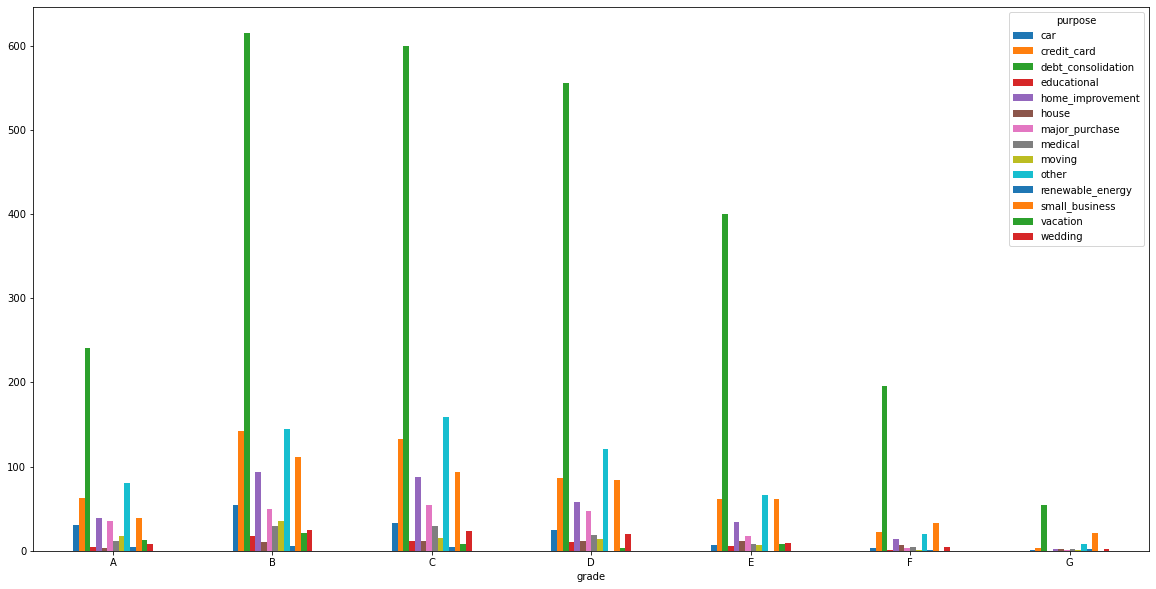

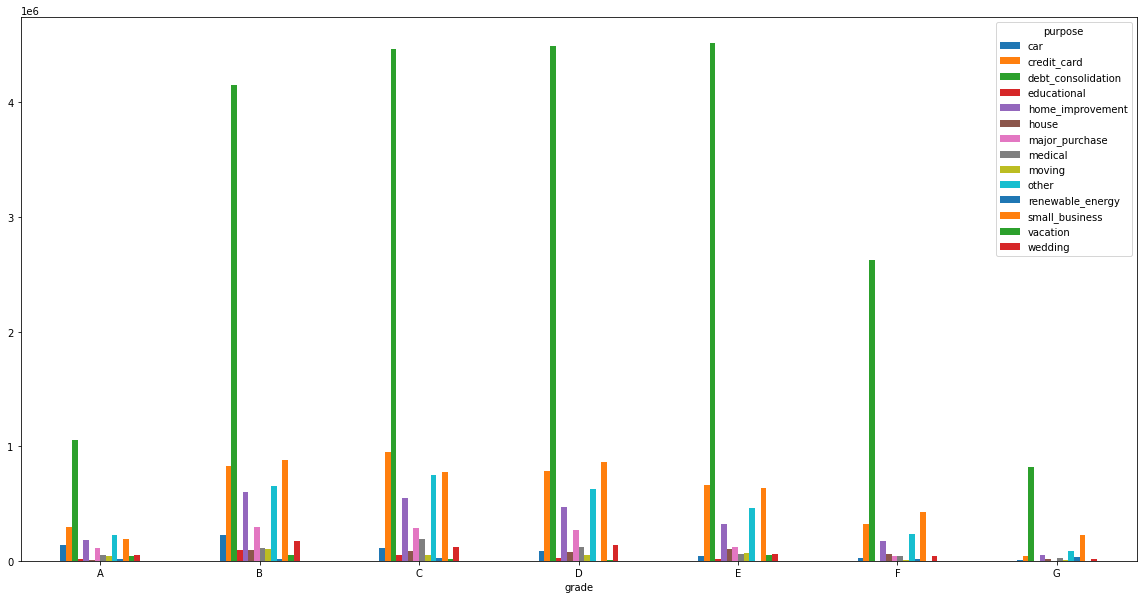

In [47]:
# Creating barplot
barplot = crosstb1.plot.bar(rot=0, figsize=(20, 10))
barplot = crosstb2.plot.bar(rot=0, figsize=(20, 10))

### Conclusion
- **For each of the grade, the debt_consolidation purpose is the largest basket for amount defaulted**

### 3. Grade : LC assigned loan grade X home_ownership and the remaining principal amount

In [48]:
# creating a cross tab of first - the count and then the amount aggregated to be collected

crosstb3 = pd.crosstab(df_loan_chargedOff['grade'], df_loan_chargedOff['home_ownership'])
print(crosstb3)

pd.options.display.float_format = '${:,.2f}'.format

crosstb4 = pd.crosstab(df_loan_chargedOff['grade'], df_loan_chargedOff['home_ownership'], 
            values=df_loan_chargedOff['remaining_pncp'], 
            aggfunc=np.sum)
print(crosstb4)

home_ownership  MORTGAGE  OTHER  OWN  RENT
grade                                     
A                    259      2   52   278
B                    560      5  111   681
C                    510      1  105   651
D                    404      5   77   570
E                    298      2   50   348
F                    141      0   22   146
G                     40      0   11    48
home_ownership      MORTGAGE      OTHER         OWN          RENT
grade                                                            
A              $1,143,924.25  $9,361.47 $218,371.02 $1,055,302.79
B              $3,993,748.17 $27,950.56 $561,554.01 $3,686,407.64
C              $4,046,636.22  $2,937.33 $579,683.84 $3,787,967.10
D              $3,478,325.88 $25,194.09 $586,986.61 $3,913,077.82
E              $3,615,854.41 $15,154.30 $518,558.31 $2,954,033.12
F              $2,061,427.20        NaN $280,859.96 $1,665,382.32
G                $590,353.50        NaN $171,267.89   $550,749.68


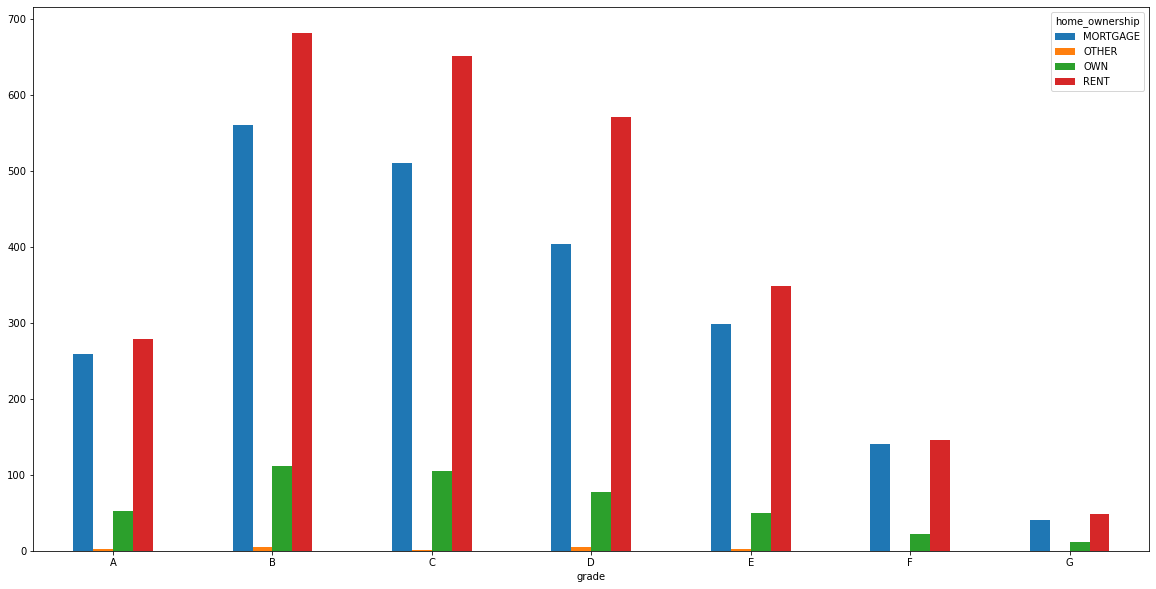

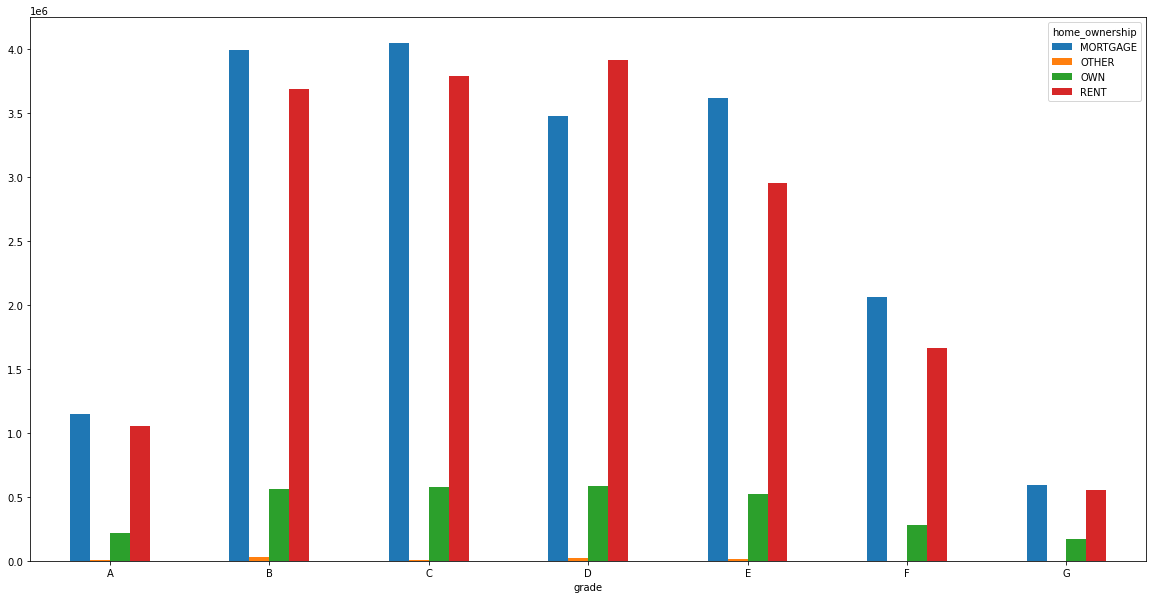

In [49]:
# Creating barplot
barplot = crosstb3.plot.bar(rot=0, figsize=(20, 10))
barplot = crosstb4.plot.bar(rot=0, figsize=(20, 10))

### Conclusion
- **For each of the grade, the people whose houses are on rented or mortgaged are the biggest defaulters**
- **For each of the grade, the two categories (MORTGAGE and RENT) are also having the biggest amount lost in terms of recovery**

### 4. Create bins of amount remaining to be recovered

In [54]:
# sort on remaining_pncp
df_loan_chargedOff.sort_values('remaining_pncp', inplace=True)

# create bins to find out the range of values we are dealing with. We will then redefine our bins
df_loan_chargedOff['bin'] = pd.cut(df_loan_chargedOff['remaining_pncp'], 10, include_lowest = True)
print(df_loan_chargedOff['bin'].unique())

[(-32.839999999999996, 3499.421], (3499.421, 6996.707], (6996.707, 10493.994], (10493.994, 13991.28], (13991.28, 17488.567], (17488.567, 20985.854], (20985.854, 24483.14], (24483.14, 27980.427], (27980.427, 31477.713], (31477.713, 34975.0]]
Categories (10, interval[float64, right]): [(-32.839999999999996, 3499.421] < (3499.421, 6996.707] < (6996.707, 10493.994] < (10493.994, 13991.28] ... (20985.854, 24483.14] < (24483.14, 27980.427] < (27980.427, 31477.713] < (31477.713, 34975.0]]


C:\Users\Debarshi\AppData\Local\Temp\ipykernel_3236\1178150915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan_chargedOff.sort_values('remaining_pncp', inplace=True)
C:\Users\Debarshi\AppData\Local\Temp\ipykernel_3236\1178150915.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan_chargedOff['bin'] = pd.cut(df_loan_chargedOff['remaining_pncp'], 10, include_lowest = True)


In [57]:
# let's redefine our bins
bins = [-100, 1000,5000,10000,15000,20000,25000,30000,35000]
df_loan_chargedOff['bin'] = pd.cut(df_loan_chargedOff['remaining_pncp'], bins, include_lowest = True)
print(df_loan_chargedOff)

           id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
37034  390172       5600         5600          $675.00   36 months   12.53%   
37922  369240       1500         1500        $1,206.13   36 months   12.53%   
39432  200805       5000         5000        $1,200.00   36 months   13.93%   
39508  176062       2800         2800          $700.00   36 months   12.17%   
11085  820963       2000         2000        $2,000.00   36 months   11.49%   
...       ...        ...          ...              ...         ...      ...   
15765  741779      35000        35000       $34,460.11   60 months   19.29%   
6270   971404      35000        35000       $34,725.00   60 months   11.71%   
9357   850713      35000        35000       $34,975.00   60 months   20.25%   
5663   981482      35000        35000       $35,000.00   60 months   13.49%   
8707   859150      35000        35000       $34,975.00   60 months   13.99%   

       installment grade sub_grade emp_length  ... 

C:\Users\Debarshi\AppData\Local\Temp\ipykernel_3236\2421934110.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan_chargedOff['bin'] = pd.cut(df_loan_chargedOff['remaining_pncp'], bins, include_lowest = True)


### 5. cross tab of bins Vs emp_length

In [59]:
# creating a cross tab of bins of amount remaining vs the length of employment of the defaulter
crosstb5 = pd.crosstab(df_loan_chargedOff['emp_length'], df_loan_chargedOff['bin'])
print(crosstb5)

pd.options.display.float_format = '${:,.2f}'.format

crosstb6 = pd.crosstab(df_loan_chargedOff['emp_length'], df_loan_chargedOff['bin'], 
            values=df_loan_chargedOff['remaining_pncp'], 
            aggfunc=np.sum)
print(crosstb6)

bin         (-100.001, 1000.0]  (1000.0, 5000.0]  (5000.0, 10000.0]  \
emp_length                                                            
1 year                      41               191                 95   
10+ years                   83               383                347   
2 years                     41               252                140   
3 years                     43               231                151   
4 years                     38               155                131   
5 years                     28               168                133   
6 years                     15               111                 81   
7 years                     13                85                 78   
8 years                     10                72                 58   
9 years                      9                46                 52   
< 1 year                    56               277                148   

bin         (10000.0, 15000.0]  (15000.0, 20000.0]  (20000.0, 25000.0]  \
em

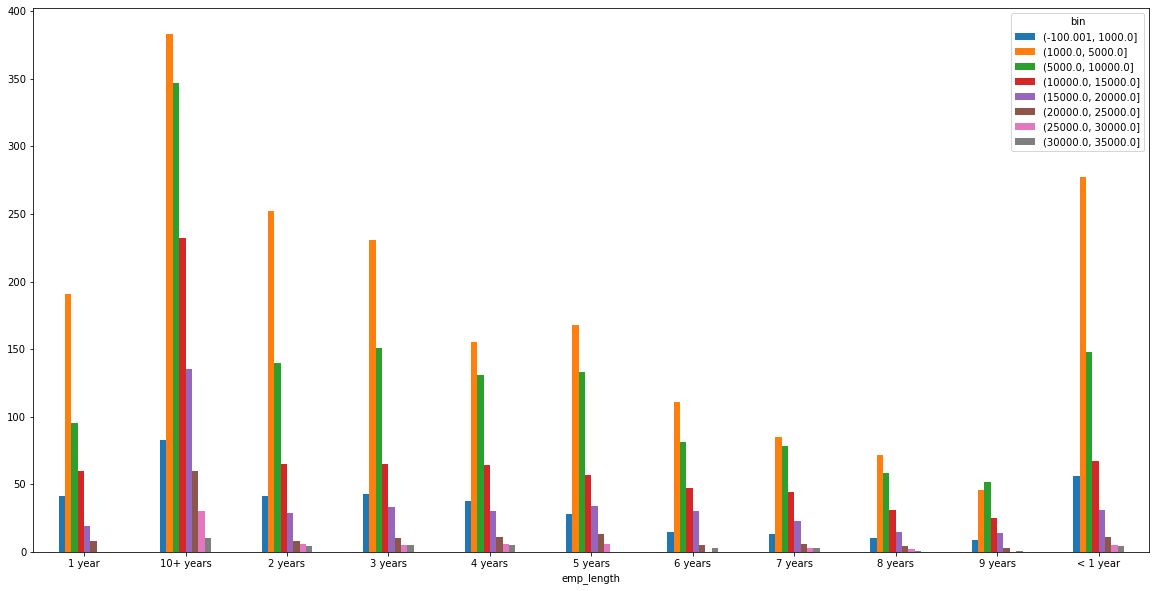

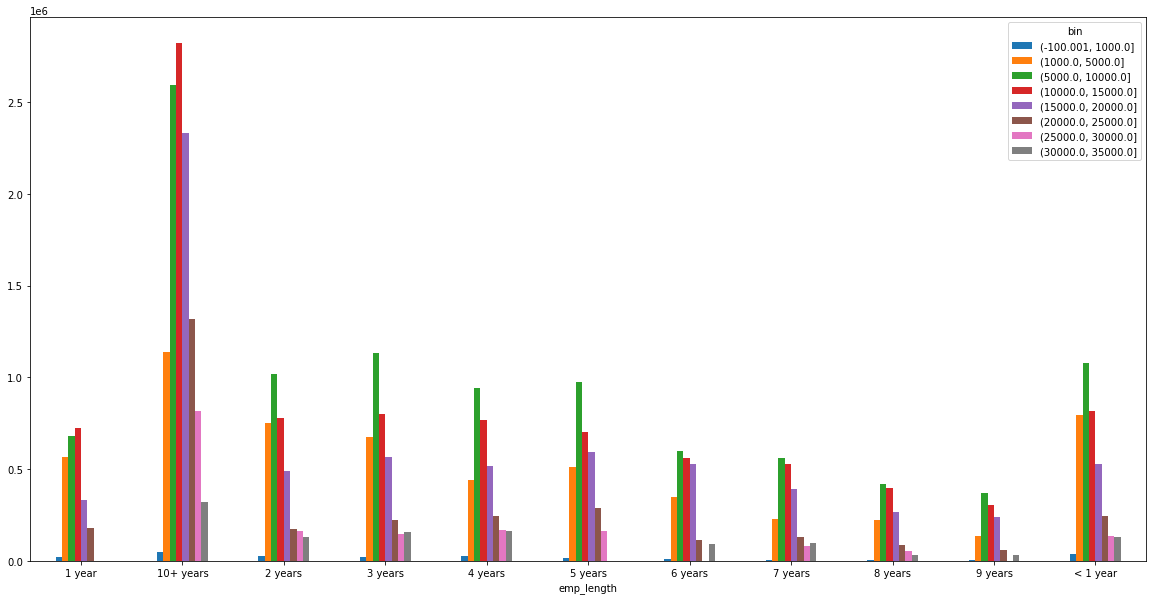

In [60]:
# Creating barplot
barplot = crosstb5.plot.bar(rot=0, figsize=(20, 10))
barplot = crosstb6.plot.bar(rot=0, figsize=(20, 10))

### 6. cross tab of bins Vs verfication Status

In [73]:
# creating a cross tab of bins of amount remaining vs the verification status of income of the defaulter
crosstb5 = pd.crosstab(df_loan_chargedOff['bin'], df_loan_chargedOff['verification_status'])
print(crosstb5)

pd.options.display.float_format = '${:,.2f}'.format

crosstb6 = pd.crosstab(df_loan_chargedOff['bin'], df_loan_chargedOff['verification_status'], 
            values=df_loan_chargedOff['remaining_pncp'], 
            aggfunc=np.sum)
print(crosstb6)

verification_status  Not Verified  Source Verified  Verified
bin                                                         
(-100.001, 1000.0]            240              100        72
(1000.0, 5000.0]              981              595       493
(5000.0, 10000.0]             509              421       544
(10000.0, 15000.0]            173              194       413
(15000.0, 20000.0]             43               72       286
(20000.0, 25000.0]              7               29       104
(25000.0, 30000.0]              0                8        57
(30000.0, 35000.0]              0                5        31
verification_status  Not Verified  Source Verified      Verified
bin                                                             
(-100.001, 1000.0]    $141,080.23       $62,631.21    $41,175.49
(1000.0, 5000.0]    $2,815,980.29    $1,739,374.86 $1,528,400.65
(5000.0, 10000.0]   $3,607,529.97    $3,109,551.63 $4,060,345.14
(10000.0, 15000.0]  $2,042,626.10    $2,356,713.97 $5,085,704.98


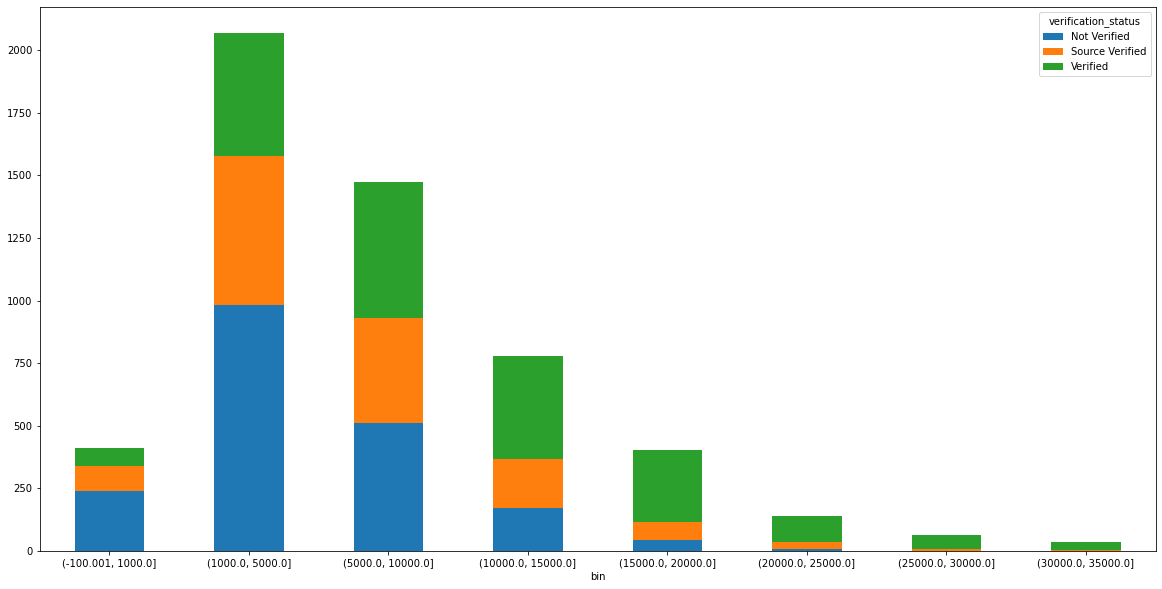

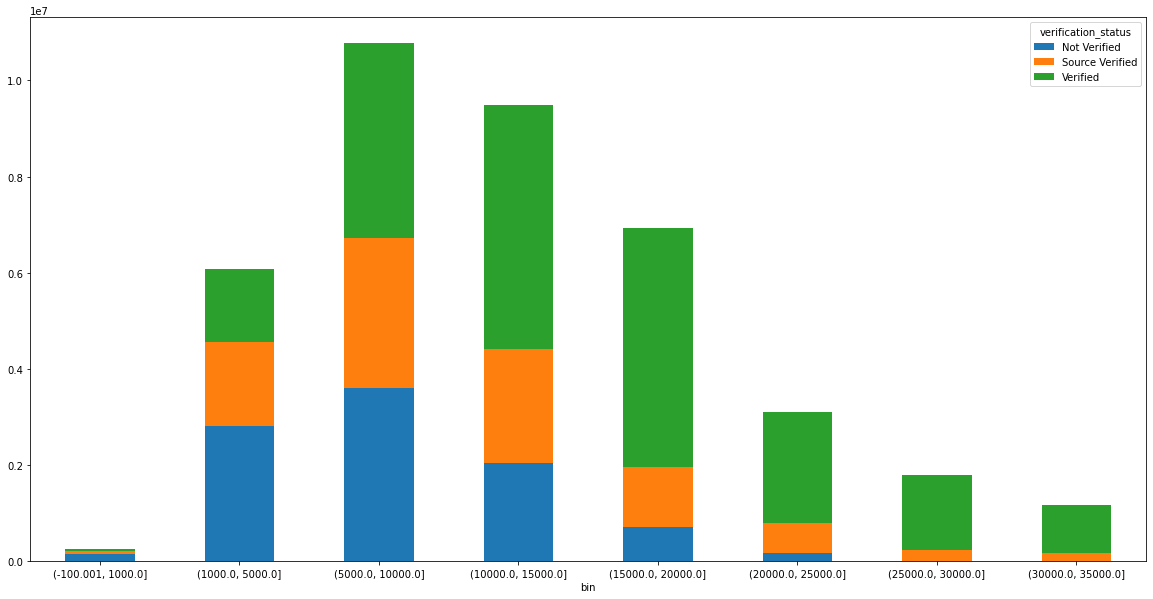

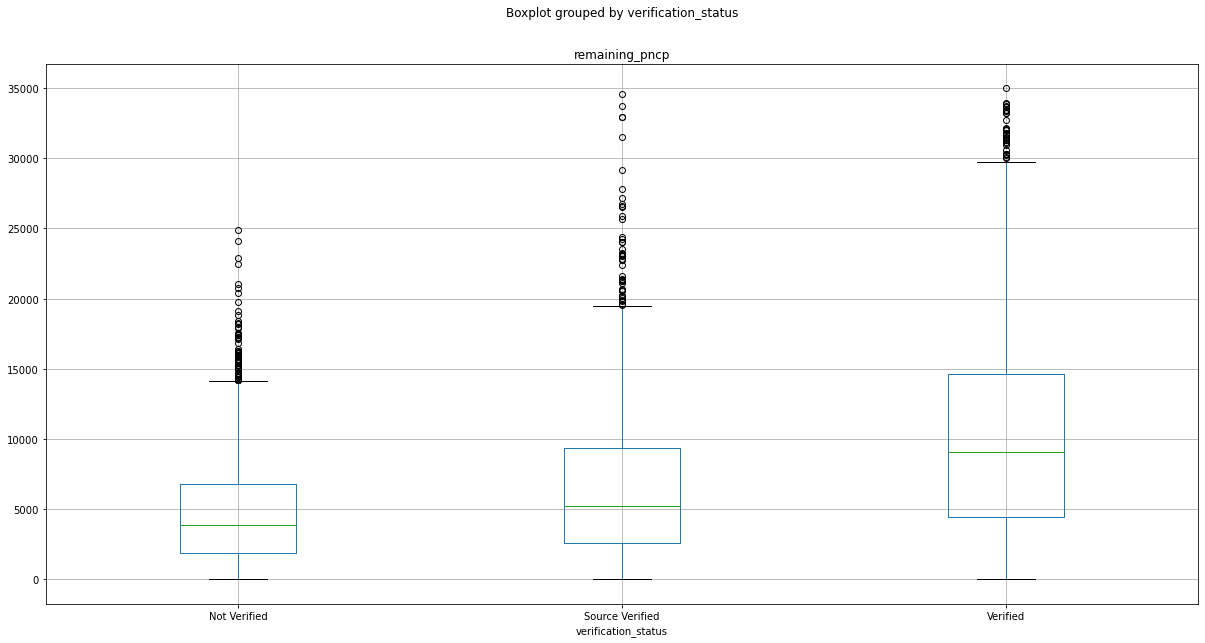

In [86]:
# Creating barplot
barplot = crosstb5.plot.bar(rot=0, figsize=(20,10), stacked = True)
barplot = crosstb6.plot.bar(rot=0, figsize=(20, 10), stacked = True)
bxplot = df_loan_chargedOff.boxplot(by = 'verification_status',
                                    column = 'remaining_pncp',
                                    figsize=(20,10))

### Conclusion
- **For each of the bin of defaulted amount, the max number is in the bin of 1000 to 5000 $. More unverified borrowers are there**
- **However, the cummulated value of the amount defaulted is almost same in the bin of 1K-5K. Interestingly, the verified borrowers have higher amount defaulted**
- **This is also shown by the box plot. The amount defaulted by people who were "Verified" is more in average as well compared to who were not verified**

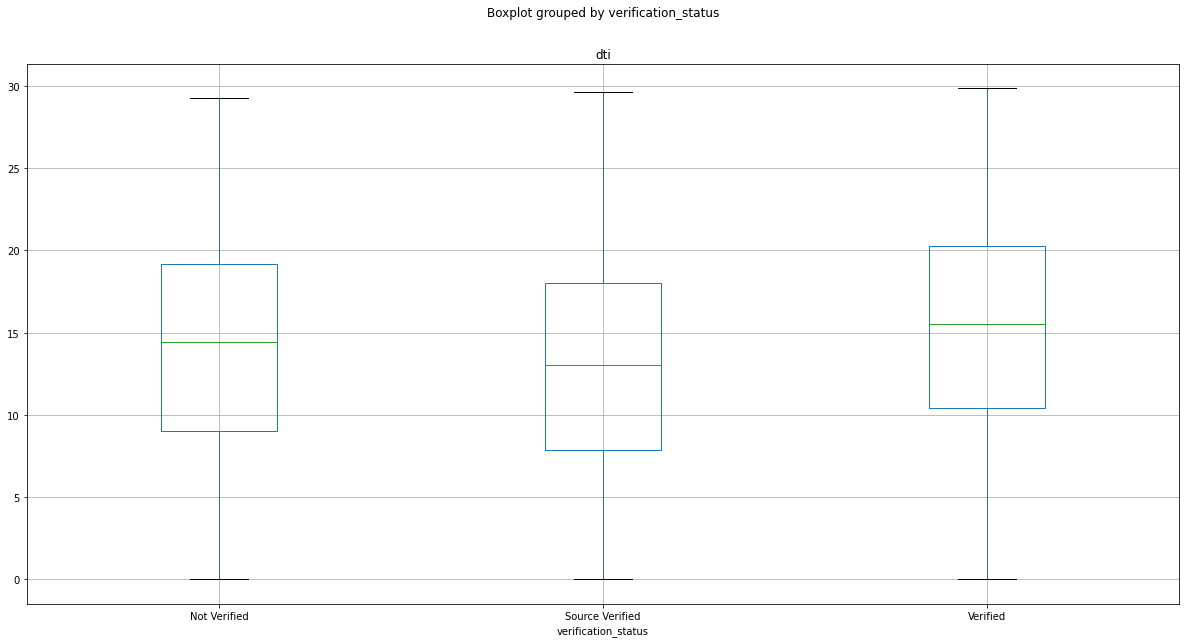

In [88]:
## Also let's see do the dti of people had an impact on being default
bxplot = df_loan_chargedOff.boxplot(by = 'verification_status',
                                    column = 'dti',
                                    figsize=(20,10))

### Conclusion
- **More or less people from different verified status had the same range of dti's**

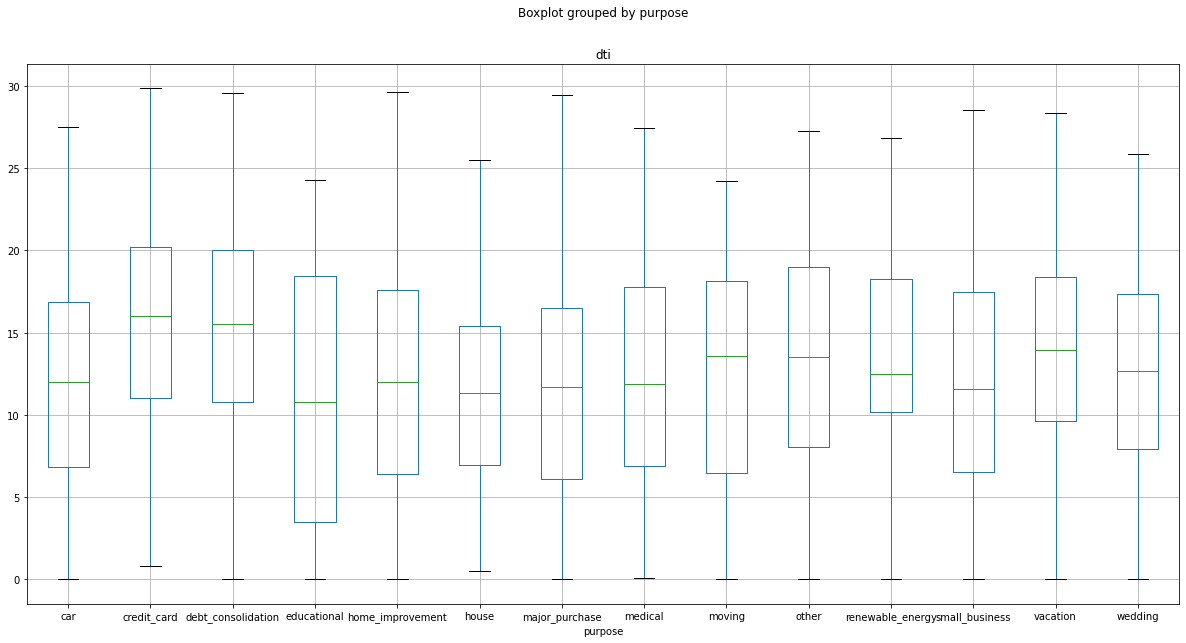

In [89]:
## Also let's see do the dti when compared to their purpose, of people had an impact on being default
bxplot = df_loan_chargedOff.boxplot(by = 'purpose',
                                    column = 'dti',
                                    figsize=(20,10))

### Conclusion
- **The purpose of "credit_card" and "debt_resolution" had the higher range of dti**

## Recommendations

- Loan category of B, C, D and E should have a deeper scrutiny before approving the loans.
- The purpose of 'Dept-consolidation' often ends up being defaulted irrespective of other paramters
- The people whose houses are on RENT or MORTGAGE has higher chances of being default
- Income sources should be verified